In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

In [53]:
df = pd.read_excel(r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\RK_PURAM_DATA_0null.xlsx')

In [54]:
df=df.set_index('From Date')

In [55]:
BL_data=df.loc["2020-01-30":"2020-03-22"]
SL_data=df.loc["2020-03-24":"2020-04-14"]
RL_data=df.loc["2020-04-15":"2020-05-17"]
LL_data=df.loc["2020-05-18":"2020-07-31"]
AL_data=df.loc["2020-08-01":"2020-11-30"]

In [56]:
BL_data.columns

Index(['PM2.5', 'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone'], dtype='object')

In [58]:
BL_data.columns=['BLPM25', 'BLPM1', 'BLNO', 'BLNO2', 'BLNOx', 'BLNH3', 'BLSO2', 'BLCO', 'BLOzone']
SL_data.columns=['SLPM25', 'SLPM1', 'SLNO', 'SLNO2', 'SLNOx', 'SLNH3', 'SLSO2', 'SLCO', 'SLOzone']
RL_data.columns=['RLPM25', 'RLPM1', 'RLNO', 'RLNO2', 'RLNOx', 'RLNH3', 'RLSO2', 'RLCO', 'RLOzone']
LL_data.columns=['LLPM25', 'LLPM1', 'LLNO', 'LLNO2', 'LLNOx', 'LLNH3', 'LLSO2', 'LLCO', 'LLOzone']
AL_data.columns=['ALPM25', 'ALPM1', 'ALNO', 'ALNO2', 'ALNOx', 'ALNH3', 'ALSO2', 'ALCO', 'ALOzone']

In [36]:
'''BL_data.reset_index()
SL_data.reset_index()
RL_data.reset_index()
LL_data.reset_index()
AL_data.reset_index()'''

,From Date,ALPM2.5,ALPM1,ALNO,ALNO2,ALNOx,ALNH3,ALSO2,ALCO,ALOzone
0,2020-08-01,19.04,58.38,7.33,32.21,23.10,39.57,11.48,0.77,12.29
1,2020-08-02,12.22,45.35,12.41,26.23,24.06,36.62,9.96,0.69,11.28
2,2020-08-03,15.79,58.68,9.76,34.22,26.16,37.59,10.69,0.65,11.86
3,2020-08-04,14.35,49.72,9.71,35.29,26.70,27.11,10.12,0.68,16.72
4,2020-08-05,15.64,54.31,13.09,40.16,32.02,30.59,9.54,0.81,14.07
...,...,...,...,...,...,...,...,...,...,...
117,2020-11-26,118.98,175.24,28.16,53.06,51.18,27.64,10.66,1.47,28.21
118,2020-11-27,79.76,136.08,38.22,50.97,58.28,22.76,12.19,1.61,33.05
119,2020-11-28,131.79,203.95,61.03,57.18,80.18,21.14,13.82,1.84,46.65
120,2020-11-29,143.31,217.28,86.70,65.64,105.59,20.84,16.78,1.95,47.66


In [5]:
frames1=[df.loc["2013-01-30":"2013-03-22"],df.loc["2014-01-30":"2014-03-22"],df.loc["2015-01-30":"2015-03-22"],df.loc["2016-01-30":"2016-03-22"],df.loc["2017-01-30":"2017-03-22"],df.loc["2018-01-30":"2018-03-22"],df.loc["2019-01-30":"2019-03-22"]]
nolockbl_data=pd.concat(frames1)
frames2=[df.loc["2013-03-24":"2013-04-14"],df.loc["2014-03-24":"2014-04-14"],df.loc["2015-03-24":"2015-04-14"],df.loc["2016-03-24":"2016-04-14"],df.loc["2017-03-24":"2017-04-14"],df.loc["2018-03-24":"2018-04-14"],df.loc["2019-03-24":"2019-04-14"]]
noLocksl_data=pd.concat(frames2)
frames3=[df.loc["2013-04-15":"2013-05-17"],df.loc["2014-04-15":"2014-05-17"],df.loc["2015-04-15":"2015-05-17"],df.loc["2016-04-15":"2016-05-17"],df.loc["2017-04-15":"2017-05-17"],df.loc["2018-04-15":"2018-05-17"],df.loc["2019-04-15":"2019-05-17"]]
noLockrl_data=pd.concat(frames3)
frames4=[df.loc["2013-05-18":"2013-07-31"],df.loc["2014-05-18":"2014-07-31"],df.loc["2015-05-18":"2015-07-31"],df.loc["2016-05-18":"2016-07-31"],df.loc["2017-05-18":"2017-07-31"],df.loc["2018-05-18":"2018-07-31"],df.loc["2019-05-18":"2019-07-31"]]
noLockll_data=pd.concat(frames4)
frames5=[df.loc["2013-08-01":"2013-11-30"],df.loc["2014-06-01":"2014-11-30"],df.loc["2015-08-01":"2015-11-30"],df.loc["2016-08-01":"2016-11-30"],df.loc["2017-08-01":"2017-11-30"],df.loc["2018-08-01":"2018-11-30"],df.loc["2019-08-01":"2019-11-30"]]
noLockal_data=pd.concat(frames5)



In [1]:
sns.set_style(style='white')
s=sns.boxplot(data=[BL_data.BLPM25,SL_data.SLPM25,RL_data.RLPM25,LL_data.LLPM25,AL_data.ALPM25],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("PM2.5 concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(PM2.5)-RKPURAM", fontsize= 12)


NameError: name 'sns' is not defined

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(PM10)-RKPURAM')

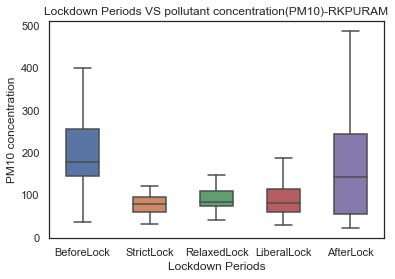

In [103]:
sns.set_style(style='white')
s=sns.boxplot(data=[BL_data.BLPM1,SL_data.SLPM1,RL_data.RLPM1,LL_data.LLPM1,AL_data.ALPM1],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("PM10 concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(PM10)-RKPURAM", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(NO)-RKPURAM')

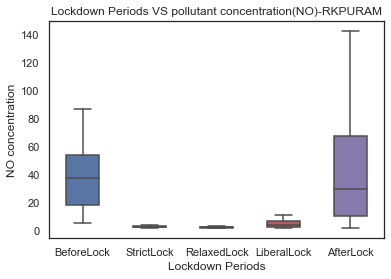

In [104]:
sns.set_style(style='white')
s=sns.boxplot(data=[BL_data.BLNO,SL_data.SLNO,RL_data.RLNO,LL_data.LLNO,AL_data.ALNO],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("NO concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(NO)-RKPURAM", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(NO2)-RKPURAM')

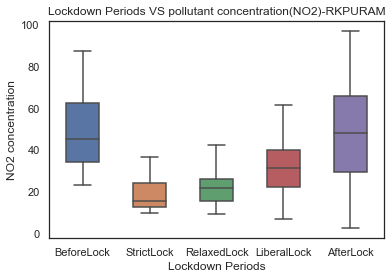

In [105]:
sns.set_style(style='white')
s=sns.boxplot(data=[BL_data.BLNO2,SL_data.SLNO2,RL_data.RLNO2,LL_data.LLNO2,AL_data.ALNO2],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("NO2 concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(NO2)-RKPURAM", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(NOx)-RKPURAM')

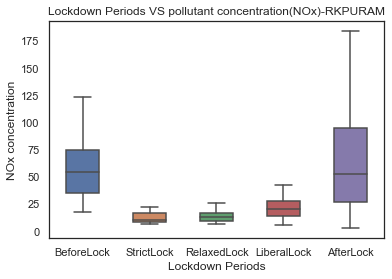

In [106]:
s=sns.boxplot(data=[BL_data.BLNOx,SL_data.SLNOx,RL_data.RLNOx,LL_data.LLNOx,AL_data.ALNOx],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("NOx concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(NOx)-RKPURAM", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(NH3)-RKPURAM')

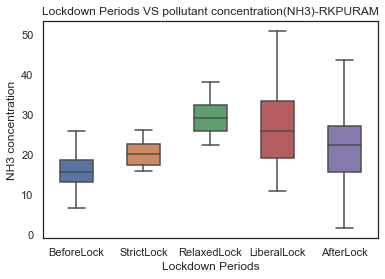

In [107]:
s=sns.boxplot(data=[BL_data.BLNH3,SL_data.SLNH3,RL_data.RLNH3,LL_data.LLNH3,AL_data.ALNH3],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("NH3 concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(NH3)-RKPURAM", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(Ozone)-RKPURAM')

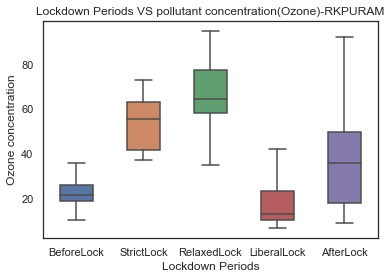

In [108]:
s=sns.boxplot(data=[BL_data.BLOzone,SL_data.SLOzone,RL_data.RLOzone,LL_data.LLOzone,AL_data.ALOzone],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("Ozone concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(Ozone)-RKPURAM", fontsize= 12)

## ANAND VIHAR

In [129]:
df = pd.read_excel(r'D:\Downloads\AV_DATA_0null.xlsx')

In [130]:
df=df.set_index('From Date')

In [131]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH',
       'WS', 'WD', 'SR', 'BP', 'AT'],
      dtype='object')

In [132]:
df=df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone']]

In [133]:
BL_data=df.loc["2020-01-30":"2020-03-22"]
SL_data=df.loc["2020-03-24":"2020-04-14"]
RL_data=df.loc["2020-04-15":"2020-05-17"]
LL_data=df.loc["2020-05-18":"2020-07-31"]
AL_data=df.loc["2020-08-01":"2020-11-30"]

In [134]:
BL_data.columns=['BLPM25', 'BLPM1', 'BLNO', 'BLNO2', 'BLNOx', 'BLNH3', 'BLSO2', 'BLCO', 'BLOzone']
SL_data.columns=['SLPM25', 'SLPM1', 'SLNO', 'SLNO2', 'SLNOx', 'SLNH3', 'SLSO2', 'SLCO', 'SLOzone']
RL_data.columns=['RLPM25', 'RLPM1', 'RLNO', 'RLNO2', 'RLNOx', 'RLNH3', 'RLSO2', 'RLCO', 'RLOzone']
LL_data.columns=['LLPM25', 'LLPM1', 'LLNO', 'LLNO2', 'LLNOx', 'LLNH3', 'LLSO2', 'LLCO', 'LLOzone']
AL_data.columns=['ALPM25', 'ALPM1', 'ALNO', 'ALNO2', 'ALNOx', 'ALNH3', 'ALSO2', 'ALCO', 'ALOzone']

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(PM2.5)')

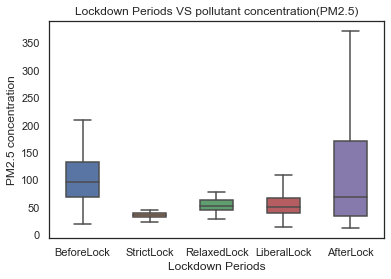

In [135]:
sns.set_style(style='white')
s=sns.boxplot(data=[BL_data.BLPM25,SL_data.SLPM25,RL_data.RLPM25,LL_data.LLPM25,AL_data.ALPM25],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("PM2.5 concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(PM2.5)", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(PM10)')

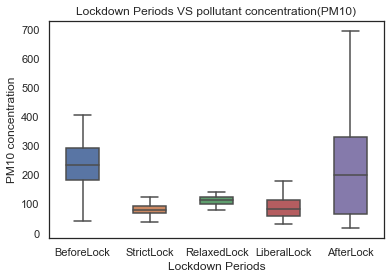

In [136]:
sns.set_style(style='white')
s=sns.boxplot(data=[BL_data.BLPM1,SL_data.SLPM1,RL_data.RLPM1,LL_data.LLPM1,AL_data.ALPM1],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("PM10 concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(PM10)", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(NO)')

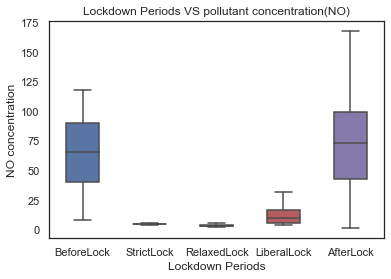

In [137]:
sns.set_style(style='white')
s=sns.boxplot(data=[BL_data.BLNO,SL_data.SLNO,RL_data.RLNO,LL_data.LLNO,AL_data.ALNO],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("NO concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(NO)", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(NO2)')

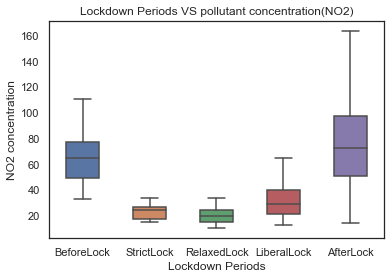

In [138]:
sns.set_style(style='white')
s=sns.boxplot(data=[BL_data.BLNO2,SL_data.SLNO2,RL_data.RLNO2,LL_data.LLNO2,AL_data.ALNO2],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("NO2 concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(NO2)", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(NOx)')

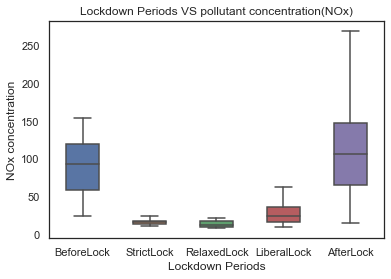

In [139]:
s=sns.boxplot(data=[BL_data.BLNOx,SL_data.SLNOx,RL_data.RLNOx,LL_data.LLNOx,AL_data.ALNOx],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("NOx concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(NOx)", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(NH3)')

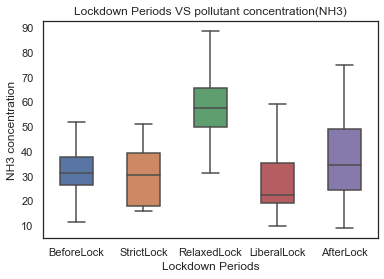

In [140]:
s=sns.boxplot(data=[BL_data.BLNH3,SL_data.SLNH3,RL_data.RLNH3,LL_data.LLNH3,AL_data.ALNH3],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("NH3 concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(NH3)", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(Ozone)')

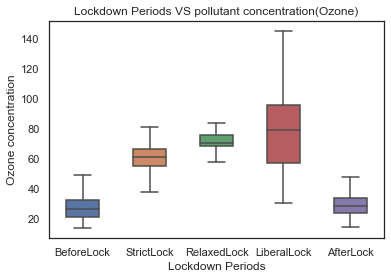

In [141]:
s=sns.boxplot(data=[BL_data.BLOzone,SL_data.SLOzone,RL_data.RLOzone,LL_data.LLOzone,AL_data.ALOzone],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("Ozone concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(Ozone)", fontsize= 12)

# ITO

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel(r'D:\Downloads\2013-2020-ITO (1) (2).xlsx')

In [4]:
df=df.set_index('From Date')

In [5]:
df.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone'], dtype='object')

In [6]:
df=df[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone']]

In [7]:
BL_data=df.loc["2020-01-30":"2020-03-22"]
SL_data=df.loc["2020-03-24":"2020-04-14"]
RL_data=df.loc["2020-04-15":"2020-05-17"]
LL_data=df.loc["2020-05-18":"2020-07-31"]
AL_data=df.loc["2020-08-01":"2020-11-30"]

In [8]:
BL_data.columns=['BLPM25', 'BLNO', 'BLNO2', 'BLNOx', 'BLNH3', 'BLSO2', 'BLOzone']
SL_data.columns=['SLPM25', 'SLNO', 'SLNO2', 'SLNOx', 'SLNH3', 'SLSO2', 'SLOzone']
RL_data.columns=['RLPM25', 'RLNO', 'RLNO2', 'RLNOx', 'RLNH3', 'RLSO2', 'RLOzone']
LL_data.columns=['LLPM25', 'LLNO', 'LLNO2', 'LLNOx', 'LLNH3', 'LLSO2', 'LLOzone']
AL_data.columns=['ALPM25', 'ALNO', 'ALNO2', 'ALNOx', 'ALNH3', 'ALSO2', 'ALOzone']

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(PM2.5)')

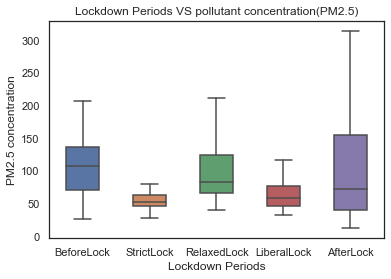

In [11]:
sns.set_style(style='white')
s=sns.boxplot(data=[BL_data.BLPM25,SL_data.SLPM25,RL_data.RLPM25,LL_data.LLPM25,AL_data.ALPM25],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("PM2.5 concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(PM2.5)", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(NO)')

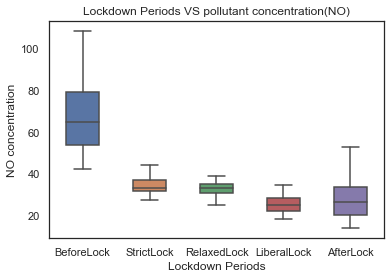

In [12]:
sns.set_style(style='white')
s=sns.boxplot(data=[BL_data.BLNO,SL_data.SLNO,RL_data.RLNO,LL_data.LLNO,AL_data.ALNO],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("NO concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(NO)", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(NO2)')

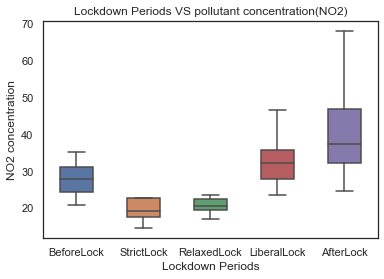

In [13]:
sns.set_style(style='white')
s=sns.boxplot(data=[BL_data.BLNO2,SL_data.SLNO2,RL_data.RLNO2,LL_data.LLNO2,AL_data.ALNO2],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("NO2 concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(NO2)", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(NOx)')

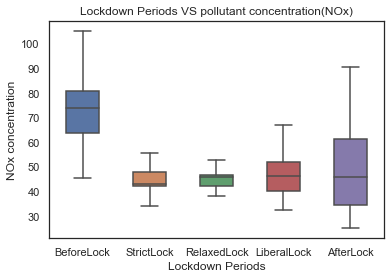

In [14]:
s=sns.boxplot(data=[BL_data.BLNOx,SL_data.SLNOx,RL_data.RLNOx,LL_data.LLNOx,AL_data.ALNOx],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("NOx concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(NOx)", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(NH3)')

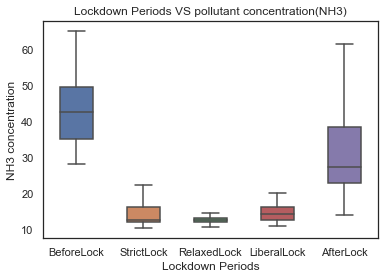

In [15]:
s=sns.boxplot(data=[BL_data.BLNH3,SL_data.SLNH3,RL_data.RLNH3,LL_data.LLNH3,AL_data.ALNH3],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("NH3 concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(NH3)", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(Ozone)')

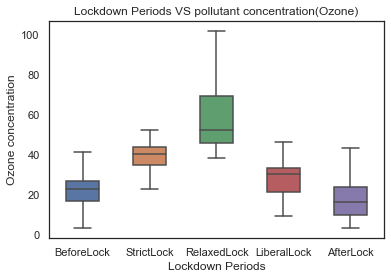

In [16]:
s=sns.boxplot(data=[BL_data.BLOzone,SL_data.SLOzone,RL_data.RLOzone,LL_data.LLOzone,AL_data.ALOzone],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("Ozone concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(Ozone)", fontsize= 12)

Text(0.5, 1.0, 'Lockdown Periods VS pollutant concentration(SO2)')

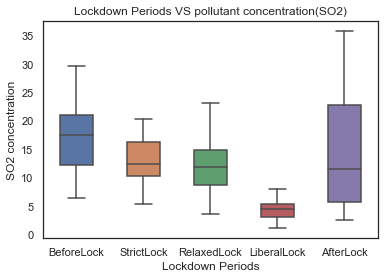

In [18]:
s=sns.boxplot(data=[BL_data.BLSO2,SL_data.SLSO2,RL_data.RLSO2,LL_data.LLSO2,AL_data.ALSO2],showfliers=False,width= 0.5)
s.set_xticklabels(['BeforeLock','StrictLock','RelaxedLock','LiberalLock','AfterLock'])
plt.xlabel("Lockdown Periods", fontsize= 12)
plt.ylabel("SO2 concentration", fontsize= 12)
plt.title("Lockdown Periods VS pollutant concentration(SO2)", fontsize= 12)